##### Tittle of Project : Sentiment Analysis on UCI ML Drug Review Dataset Using NLP

##### Problem Statement :
Healthcare platforms receive huge amounts of patient-written drug reviews. Manually reading these reviews to understand drug effectiveness is time-consuming and subjective.

This project aims to develop an NLP-based Sentiment Analysis solution using the UCI ML Drug Review dataset to automatically analyze patient feedback and classify reviews into positive or negative sentiment. This helps pharmaceutical companies and healthcare professionals make data-driven decisions about drug performance and patient experience.

### Load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
dftraindata=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\CP2\archive (2)\drugsComTrain_raw.csv")
dftraindata

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


###### Important columns: review (text), rating (1–10).

In [4]:
dftraindata.shape

(161297, 7)

In [5]:
dftraindata.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
161292    False
161293    False
161294    False
161295    False
161296    False
Length: 161297, dtype: bool

In [6]:
dftraindata.duplicated().sum()

np.int64(0)

In [7]:
dftraindata.isnull()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
161292,False,False,False,False,False,False,False
161293,False,False,False,False,False,False,False
161294,False,False,False,False,False,False,False
161295,False,False,False,False,False,False,False


###### checking null value anf filling null value

In [8]:
dftraindata.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
dftraindata["condition"] = dftraindata["condition"].fillna("Unknown")


##### after filling null with unknown name  in condition columns

In [10]:
dftraindata.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

###### THE ABOVE PROCESS IS TRAIN DATA OF DATA PREPROCESSING UPTO NULL VALUE

##### NOW TEST DATA FOR DATA CLEANING AND PREPROCESSING FOR CHECK NULL VALUES

In [11]:
dftestdata=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\CP2\archive (2)\drugsComTest_raw.csv")
dftestdata

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [12]:
dftestdata.shape

(53766, 7)

In [14]:
dftestdata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53761    False
53762    False
53763    False
53764    False
53765    False
Length: 53766, dtype: bool

In [15]:
dftraindata.duplicated().sum()

np.int64(0)

In [16]:
dftestdata.isnull()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
53761,False,False,False,False,False,False,False
53762,False,False,False,False,False,False,False
53763,False,False,False,False,False,False,False
53764,False,False,False,False,False,False,False


In [17]:
dftestdata.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [18]:
dftestdata["condition"] = dftestdata["condition"].fillna("Unknown")

In [19]:
dftestdata.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

###### “The usefulCount column was not used because it does not influence the actual sentiment of the review. It only shows how many people found the review helpful, which is unrelated to whether the review is positive or negative. Including it could add noise and reduce model accuracy.”

In [20]:
dftraindata= dftraindata.drop(columns=["usefulCount"], errors="ignore")
dftestdata = dftestdata.drop(columns=["usefulCount"], errors="ignore")


##### After droping useful count in the train and test dataset having like this

In [23]:
dftraindata.head()

,uniqueID,drugName,condition,review,rating,date
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16


In [22]:
dftestdata.head()

,uniqueID,drugName,condition,review,rating,date
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15


In [25]:
import sklearn

In [24]:
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Create Sentiment Label from Rating

##### Let’s make a binary sentiment:
##### Positive (1): rating ≥ 7
##### Negative (0): rating ≤ 4
##### Ratings 5–6 → we will drop them (neutral).

In [27]:
def label_sentiment(rating):
    """
    Convert rating (1–10) to sentiment.
    You can adjust these cut-offs if you want.
    """
    if rating >= 7:
        return "positive"
    elif rating <= 4:
        return "negative"
    else:
        return "neutral"
        
dftraindata["sentiment"] = dftraindata["rating"].apply(label_sentiment)
dftestdata["sentiment"] = dftestdata["rating"].apply(label_sentiment)  # if rating exists in test

In [28]:
# If you want a simple binary classification (drop neutral):
binary_dftestdata = dftestdata[dftestdata["sentiment"] != "neutral"].copy()

print(binary_dftestdata["sentiment"].value_counts())

sentiment
positive    35440
negative    13497
Name: count, dtype: int64


In [29]:
# If you want a simple binary classification (drop neutral):
binary_dftraindata = dftraindata[dftraindata["sentiment"] != "neutral"].copy()

print(binary_dftraindata["sentiment"].value_counts())

sentiment
positive    106866
negative     40075
Name: count, dtype: int64


In [33]:
dftraindata.head()

,uniqueID,drugName,condition,review,rating,date,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,positive


In [31]:
dftestdata.head()

,uniqueID,drugName,condition,review,rating,date,sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,positive
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,positive
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,positive
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,positive
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,positive


In [34]:
dftestdata.tail()

,uniqueID,drugName,condition,review,rating,date,sentiment
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,positive
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,positive
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,positive
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,negative
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,positive


In [35]:
dftraindata.tail()

,uniqueID,drugName,condition,review,rating,date,sentiment
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,positive
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,negative
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,negative
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,positive
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,positive


##### Basic Text Cleaning (NLP Preprocessing)

We will:

lowercase

remove HTML tags

remove punctuation

remove numbers

remove extra spaces

In [43]:
def clean_text(text):
    if isinstance(text, float):  # if NaN or non-string
        text = str(text)
# lowercase
    text = text.lower()
# remove html tags
    text = re.sub(r"<.*?>", " ", text)
# remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)
# remove numbers
    text = re.sub(r"\d+", " ", text)
 # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
# remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [w for w in text.split() if w not in MIN_STOPWORDS]
    return " ".join(tokens)
# Apply cleaning on review column
dftraindata["clean_review"] = dftraindata["review"].apply(clean_text)
dftestdata["clean_review"]  = dftestdata["review"].apply(clean_text)

dftraindata[["review", "clean_review"]].head()


,review,clean_review
0,"""It has no side effect, I take it in combinati...",no side effect take combination bystolic mg fi...
1,"""My son is halfway through his fourth week of ...",son halfway through his fourth week intuniv be...
2,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
3,"""This is my first time using any form of birth...",first time using form birth control m glad wen...
4,"""Suboxone has completely turned my life around...",suboxone completely turned life around feel he...


In [44]:
dftestdata[["review", "clean_review"]].head()

,review,clean_review
0,"""I&#039;ve tried a few antidepressants over th...",ve tried few antidepressants over years citalo...
1,"""My son has Crohn&#039;s disease and has done ...",son crohn s disease done very well asacol no c...
2,"""Quick reduction of symptoms""",quick reduction symptoms
3,"""Contrave combines drugs that were used for al...",contrave combines drugs used alcohol smoking o...
4,"""I have been on this birth control for one cyc...",birth control one cycle after reading some rev...


In [39]:
# minimal stopword set to avoid requiring NLTK downloads
MIN_STOPWORDS = {
    'a','an','the','and','or','is','are','was','were','in','on','of','for','to','it','this','that',
    'i','you','he','she','they','we','my','your','our','their','me','him','her','them','with','as',
    'at','by','from','be','been','has','have','had','but','not','so','if','about','what','which','when',
    'who','whom','where','why','how','all','any','do','does','did','will','would','can','could','should'
}

###### Train / Validation Split (from Train File)

In [45]:
X = dftraindata["clean_review"]
y = dftraindata["sentiment"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])

Train size: 129037
Validation size: 32260


##### TF–IDF Vectorization

In [47]:
tfidf = TfidfVectorizer(
    max_features=5000,    # top 5000 words
    ngram_range=(1, 2),   # unigrams + bigrams
    stop_words="english"  # remove English stopwords
)

# Fit on train, transform train & val
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)

X_train_tfidf.shape, X_val_tfidf.shape

((129037, 5000), (32260, 5000))

In [48]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4237808 stored elements and shape (129037, 5000)>

##### Train a Classification Model

In [59]:
model = LogisticRegression(
    max_iter=1000,
    n_jobs=2
)

model.fit(X_train_tfidf, y_train)




,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


##### Evaluate on Validation Set

In [53]:
import numpy as np
from collections import Counter

print("y_val shape:", y_val.shape)
print("y_pred shape:", y_val_pred.shape)

print("Unique labels in y_val:", np.unique(y_val))
print("Counts in y_val:", Counter(y_val))
print("Unique labels in y_val_pred:", np.unique(y_val_pred))
print("Counts in y_val_pred:", Counter(y_val_pred))


y_val shape: (32260,)
y_pred shape: (32260,)
Unique labels in y_val: ['negative' 'neutral' 'positive']
Counts in y_val: Counter({'positive': 21374, 'negative': 8015, 'neutral': 2871})
Unique labels in y_val_pred: ['negative' 'neutral' 'positive']
Counts in y_val_pred: Counter({'positive': 24143, 'negative': 7733, 'neutral': 384})


In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_val_pred = model.predict(X_val_tfidf)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=["Negative", "Positive","neutral"]))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 0.7889026658400496

Classification Report:

              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69      8015
    Positive       0.36      0.05      0.08      2871
     neutral       0.82      0.93      0.87     21374

    accuracy                           0.79     32260
   macro avg       0.63      0.55      0.55     32260
weighted avg       0.75      0.79      0.76     32260


Confusion Matrix:

[[ 5442   114  2459]
 [  921   137  1813]
 [ 1370   133 19871]]


##### Predict on Test File

In [67]:
if 'sentiment' in dftestdata.columns:
    X_test = dftestdata['clean_review']
    X_test_tfidf = tfidf.transform(X_test)
    y_test_true = dftestdata['sentiment']
    y_test_pred = clf.predict(X_test_tfidf)

    test_acc = accuracy_score(y_test_true, y_test_pred)
    print("\n=== TEST METRICS ===")
    print("Test Accuracy: {:.4f}".format(test_acc))
    print("\nClassification Report (Test):\n", classification_report(y_test_true, y_test_pred))
    cm_test = confusion_matrix(y_test_true, y_test_pred, labels=['positive','neutral','negative'])
    print("Confusion Matrix (Test) rows=true labels [pos,neu,neg]:\n", cm_test)




=== TEST METRICS ===
Test Accuracy: 0.7887

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.70      0.69      0.70     13497
     neutral       0.38      0.05      0.09      4829
    positive       0.82      0.93      0.87     35440

    accuracy                           0.79     53766
   macro avg       0.63      0.56      0.55     53766
weighted avg       0.75      0.79      0.76     53766

Confusion Matrix (Test) rows=true labels [pos,neu,neg]:
 [[32853   215  2372]
 [ 2999   248  1582]
 [ 3997   196  9304]]


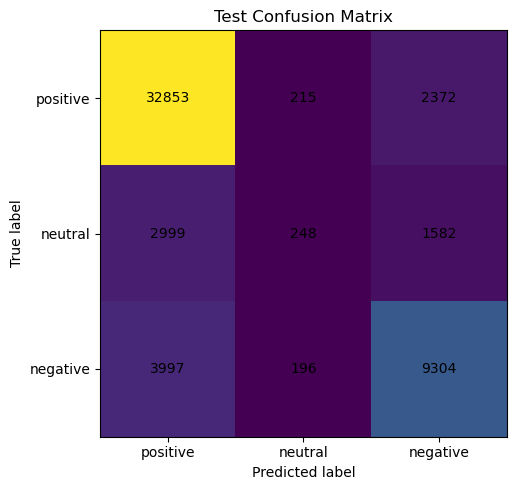

In [71]:
# Plot confusion matrix (test)
fig, ax = plt.subplots(figsize=(6,5))
ax.imshow(cm_test, interpolation='nearest')
ax.set_title("Test Confusion Matrix")
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['positive', 'neutral', 'negative'])
ax.set_yticklabels(['positive', 'neutral', 'negative'])

# Add numbers inside boxes
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        ax.text(j, i, cm_test[i, j], ha="center", va="center")

ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

plt.tight_layout()
plt.show()


In [74]:
from sklearn.metrics import confusion_matrix

cm_valid = confusion_matrix(y_val, y_val_pred, labels=['positive','neutral','negative'])

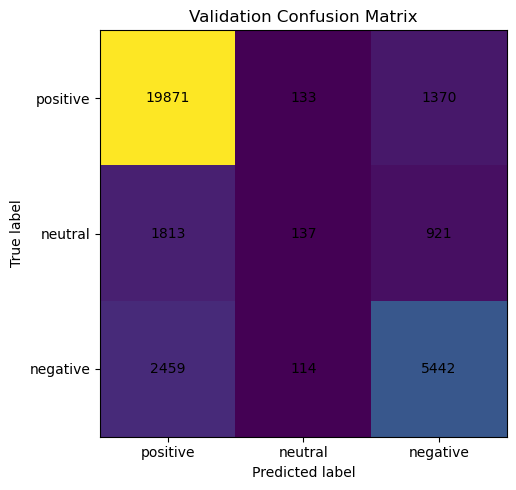

In [75]:
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm_valid, interpolation='nearest')
ax.set_title("Validation Confusion Matrix")
ax.set_xticks([0,1,2])
ax.set_yticks([0,1,2])
ax.set_xticklabels(['positive','neutral','negative'])
ax.set_yticklabels(['positive','neutral','negative'])
for i in range(cm_valid.shape[0]):
    for j in range(cm_valid.shape[1]):
        ax.text(j, i, cm_valid[i, j], ha="center", va="center")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.tight_layout()
plt.show()

In [80]:

# If test has true labels (rating → sentiment) and you already evaluated:
dftestdata['predicted_sentiment'] = y_test_pred
out_path = "drugs_test_with_predictions.csv"
dftestdata.to_csv(out_path, index=False)
print(f"\nSaved test predictions to: {out_path}")



Saved test predictions to: drugs_test_with_predictions.csv
